In [54]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
 
# ## This statement allows the visuals to render within your Jupyter Notebook.
# %matplotlib inline


> * What countries or regions rank the highest in overall happiness and each of the six factors contributing to happiness?
> * How did country ranks or scores change between the 2015 and 2016 reports, as well as the 2016 and 2017 reports?
> * Did any country experience a significant increase or decrease in happiness?
> * Bounce: Please begin your analysis, and don't hesitate to consider additional relevant questions.

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [57]:
Whappiness_2015 = pd.read_csv('Data/2015.csv')
Whappiness_2016 = pd.read_csv('Data/2016.csv')
Whappiness_2017 = pd.read_csv('Data/2017.csv')
Whappiness_2018 = pd.read_csv('Data/2018.csv')
Whappiness_2019 = pd.read_csv('Data/2019.csv')

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [59]:
Whappiness_2015.shape, Whappiness_2016.shape, Whappiness_2017.shape, Whappiness_2018.shape, Whappiness_2019.shape

((158, 12), (157, 13), (155, 12), (156, 9), (156, 9))

In [60]:
Whappiness_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [61]:
Whappiness_2016.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [62]:
Whappiness_2017.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [63]:
Whappiness_2018.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [64]:
Whappiness_2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [66]:
Whappiness_2015.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [67]:
Whappiness_2016.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [68]:
Whappiness_2017.columns

Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')

In [69]:
Whappiness_2018.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [70]:
Whappiness_2019.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [71]:
Whappiness_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [72]:
Whappiness_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

In [73]:
Whappiness_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    int64  
 2   Happiness.Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust..Government.Corruption.  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 

In [74]:
Whappiness_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     155 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [75]:
Whappiness_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [76]:
Whappiness_2015.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [77]:
Whappiness_2016.describe()

,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,78.980892,5.382185,5.282395,5.481975,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635,2.325807
std,45.466030,1.141674,1.148043,1.136493,0.412595,0.266706,0.229349,0.145507,0.111038,0.133756,0.542220
min,1.000000,2.905000,2.732000,3.078000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.817890
25%,40.000000,4.404000,4.327000,4.465000,0.670240,0.641840,0.382910,0.257480,0.061260,0.154570,2.031710
50%,79.000000,5.314000,5.237000,5.419000,1.027800,0.841420,0.596590,0.397470,0.105470,0.222450,2.290740
75%,118.000000,6.269000,6.154000,6.434000,1.279640,1.021520,0.729930,0.484530,0.175540,0.311850,2.664650
max,157.000000,7.526000,7.460000,7.669000,1.824270,1.183260,0.952770,0.608480,0.505210,0.819710,3.837720


In [78]:
Whappiness_2017.describe()

,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,78.000000,5.354019,5.452326,5.255713,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120,1.850238
std,44.888751,1.131230,1.118542,1.145030,0.420793,0.287263,0.237073,0.149997,0.134780,0.101661,0.500028
min,1.000000,2.693000,2.864884,2.521116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914
25%,39.500000,4.505500,4.608172,4.374955,0.663371,1.042635,0.369866,0.303677,0.154106,0.057271,1.591291
50%,78.000000,5.279000,5.370032,5.193152,1.064578,1.253918,0.606042,0.437454,0.231538,0.089848,1.832910
75%,116.500000,6.101500,6.194600,6.006527,1.318027,1.414316,0.723008,0.516561,0.323762,0.153296,2.144654
max,155.000000,7.537000,7.622030,7.479556,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485


In [79]:
Whappiness_2018.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000
mean,78.500000,5.375917,0.891449,1.213237,0.597346,0.454506,0.181006,0.112000
std,45.177428,1.119506,0.391921,0.302372,0.247579,0.162424,0.098471,0.096492
min,1.000000,2.905000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.453750,0.616250,1.066750,0.422250,0.356000,0.109500,0.051000
50%,78.500000,5.378000,0.949500,1.255000,0.644000,0.487000,0.174000,0.082000
75%,117.250000,6.168500,1.197750,1.463000,0.777250,0.578500,0.239000,0.137000
max,156.000000,7.632000,2.096000,1.644000,1.030000,0.724000,0.598000,0.457000


In [80]:
Whappiness_2019.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
> - Quantitative (numerical) data
> - Qualitative (categorical) data

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

> - The data source is trustworth , is produced by the Sustainable Development Solutions Network (SDSN) and the Earth Institute at Columbia University, both reputable institutions known for their focus on sustainable development and social research.

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

> - Analyzing data from 2015 to 2019 alone may lead to conclusions that do not reflect current realities.it is essential to include data from 2020 to 2024.
>   
> - we need to take account for changes in happiness and well-being that occurred during and after the pandemic, which profoundly affected individuals and societies worldwide.(The COVID-19 pandemic began in December 2019) 

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


There are some consistency issues, for example:
> - Some data sources contain different factors names that have logical meaning  like social support, family, and dystopia residual.
> - Continue with different statistical factors like standard error, lower confidence interval, upper confidence interval, whisker high, and whisker low.
> - Different in column names, like Trust (Government Corruption and Perceptions of Corruption)
> - Some countries and regions are in separate columns; others are in the same column.

### Add add the 'Region' column in  the Whappiness_2018 and Whappiness_2019

In [90]:
#to check if Country or region column in  Whappiness_2018  contains any rigions names or just contains countries names
Whappiness_2018[Whappiness_2018['Country or region'].isin(Whappiness_2015['Region'])]

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption


In [91]:
#steps to add the 'Region' column in the desired position within the Whappiness_2018 DataFrame usind region in data frame Whappiness_2015
# Step 1: Create a mapping of countries to regions from Whappiness_2015
region_mapping = Whappiness_2015.set_index('Country')['Region'].to_dict()

# Step 2: Map the regions to Whappiness_2018 using the 'Country or region' column
region_values = Whappiness_2018['Country or region'].map(region_mapping).fillna('Unknown')

# Step 3: Insert the 'Region' column at a specific location (e.g., index 2)
Whappiness_2018.insert(2, 'Region', region_values)


In [92]:
#to check if it contains null value
Whappiness_2018['Region'].isnull().sum()

0

In [93]:
Whappiness_2018.tail()

,Overall rank,Country or region,Region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
151,152,Yemen,Middle East and Northern Africa,3.355,0.442,1.073,0.343,0.244,0.083,0.064
152,153,Tanzania,Sub-Saharan Africa,3.303,0.455,0.991,0.381,0.481,0.270,0.097
153,154,South Sudan,Unknown,3.254,0.337,0.608,0.177,0.112,0.224,0.106
154,155,Central African Republic,Sub-Saharan Africa,3.083,0.024,0.000,0.010,0.305,0.218,0.038
155,156,Burundi,Sub-Saharan Africa,2.905,0.091,0.627,0.145,0.065,0.149,0.076


In [94]:
#to chech if the region values  in Whappiness_2018 is correct by compairing the region and country in bot Whappiness_2018 and Whappiness_2015
Whappiness_2015[Whappiness_2015['Country']=='Yemen']

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
135,Yemen,Middle East and Northern Africa,136,4.077,0.04367,0.54649,0.68093,0.40064,0.35571,0.07854,0.09131,1.92313


### Whappiness_2019

In [96]:
#to check if Country or region column in  Whappiness_2018  contains any rigion 
Whappiness_2019[Whappiness_2019['Country or region'].isin(Whappiness_2015['Region'])]

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption


In [97]:
#steps to add the 'Region' column in the desired position within the Whappiness_2018 DataFrame usind region in data frame Whappiness_2015
# Step 1: Create a mapping of countries to regions from Whappiness_2015
region_mapping = Whappiness_2015.set_index('Country')['Region'].to_dict()

# Step 2: Map the regions to Whappiness_2018 using the 'Country or region' column
region_values = Whappiness_2019['Country or region'].map(region_mapping).fillna('Unknown')

# Step 3: Insert the 'Region' column at a specific location (e.g., index 2)
Whappiness_2019.insert(2, 'Region', region_values)


In [98]:
#to check if it contains null value
Whappiness_2019['Region'].isnull().sum()

0

In [99]:
Whappiness_2019.tail()

,Overall rank,Country or region,Region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
151,152,Rwanda,Sub-Saharan Africa,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,Sub-Saharan Africa,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,Southern Asia,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,Sub-Saharan Africa,3.083,0.026,0.000,0.105,0.225,0.235,0.035
155,156,South Sudan,Unknown,2.853,0.306,0.575,0.295,0.010,0.202,0.091


In [100]:
#to chech if the region values  in Whappiness_2018 is correct by compairing the region and country in bot Whappiness_2018 and Whappiness_2015
Whappiness_2015[Whappiness_2015['Country']=='Rwanda']

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.7737,0.42864,0.59201,0.55191,0.22628,0.67042


### Delete unnecessary cluomns 

#### World happiness in 2015

In [103]:
Whappiness_2015.drop('Standard Error',axis =1, inplace=True)

#### World happiness in 2016

In [105]:
Whappiness_2016.drop(['Lower Confidence Interval','Upper Confidence Interval'], axis =1, inplace=True)

#### World happiness in 2017

In [107]:
Whappiness_2017.drop(['Whisker.high','Whisker.low'], axis =1, inplace=True)

## change the columns names 

In [109]:
Whappiness_2015.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [110]:
Whappiness_2017.columns

Index(['Country', 'Happiness.Rank', 'Happiness.Score',
       'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.',
       'Freedom', 'Generosity', 'Trust..Government.Corruption.',
       'Dystopia.Residual'],
      dtype='object')

In [111]:
Whappiness_2017.rename(columns ={'Happiness.Rank':'Happiness Rank', 'Happiness.Score':'Happiness Score', 'Economy..GDP.per.Capita.':'Economy (GDP per Capita)'
                                ,'Health..Life.Expectancy.':'Health (Life Expectancy)','Trust..Government.Corruption.':'Trust (Government Corruption)'} ,inplace =True) 




In [112]:
Whappiness_2017

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia.Residual
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182
...,...,...,...,...,...,...,...,...,...,...
150,Rwanda,151,3.471,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061
151,Syria,152,3.462,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574
152,Tanzania,153,3.349,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130
153,Burundi,154,2.905,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024


In [113]:
Whappiness_2015.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [114]:
Whappiness_2018.columns

Index(['Overall rank', 'Country or region', 'Region', 'Score',
       'GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [115]:
Whappiness_2018.rename(columns ={'Country or region':'Country', 'GDP per capita': 'Economy (GDP per Capita)', 'Healthy life expectancy':'Health (Life Expectancy)',
                                 'Freedom to make life choices':'Freedom', 'Perceptions of corruption':'Trust (Government Corruption)','Social support':'Family', 'Score':'Happiness Score'}, inplace =True)


In [116]:
Whappiness_2018

,Overall rank,Country,Region,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption)
0,1,Finland,Western Europe,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,Western Europe,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,Western Europe,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,Western Europe,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,Western Europe,7.487,1.420,1.549,0.927,0.660,0.256,0.357
...,...,...,...,...,...,...,...,...,...,...
151,152,Yemen,Middle East and Northern Africa,3.355,0.442,1.073,0.343,0.244,0.083,0.064
152,153,Tanzania,Sub-Saharan Africa,3.303,0.455,0.991,0.381,0.481,0.270,0.097
153,154,South Sudan,Unknown,3.254,0.337,0.608,0.177,0.112,0.224,0.106
154,155,Central African Republic,Sub-Saharan Africa,3.083,0.024,0.000,0.010,0.305,0.218,0.038


In [117]:
Whappiness_2019.columns

Index(['Overall rank', 'Country or region', 'Region', 'Score',
       'GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [118]:
Whappiness_2019.rename(columns ={'Country or region':'Country', 'GDP per capita': 'Economy (GDP per Capita)', 'Healthy life expectancy':'Health (Life Expectancy)',
                                 'Freedom to make life choices':'Freedom', 'Perceptions of corruption':'Trust (Government Corruption)','Social support':'Family', 'Score':'Happiness Score'}, inplace =True)

In [119]:
Whappiness_2019

,Overall rank,Country,Region,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption)
0,1,Finland,Western Europe,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,Western Europe,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,Western Europe,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,Western Europe,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,Western Europe,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,Sub-Saharan Africa,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,Sub-Saharan Africa,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,Southern Asia,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,Sub-Saharan Africa,3.083,0.026,0.000,0.105,0.225,0.235,0.035


c

In [121]:
Whappiness_2018['Happiness Rank'] = Whappiness_2018['Happiness Score'].rank(ascending=False)


In [122]:
Whappiness_2018

,Overall rank,Country,Region,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Happiness Rank
0,1,Finland,Western Europe,7.632,1.305,1.592,0.874,0.681,0.202,0.393,1.0
1,2,Norway,Western Europe,7.594,1.456,1.582,0.861,0.686,0.286,0.340,2.0
2,3,Denmark,Western Europe,7.555,1.351,1.590,0.868,0.683,0.284,0.408,3.0
3,4,Iceland,Western Europe,7.495,1.343,1.644,0.914,0.677,0.353,0.138,4.0
4,5,Switzerland,Western Europe,7.487,1.420,1.549,0.927,0.660,0.256,0.357,5.0
...,...,...,...,...,...,...,...,...,...,...,...
151,152,Yemen,Middle East and Northern Africa,3.355,0.442,1.073,0.343,0.244,0.083,0.064,152.0
152,153,Tanzania,Sub-Saharan Africa,3.303,0.455,0.991,0.381,0.481,0.270,0.097,153.0
153,154,South Sudan,Unknown,3.254,0.337,0.608,0.177,0.112,0.224,0.106,154.0
154,155,Central African Republic,Sub-Saharan Africa,3.083,0.024,0.000,0.010,0.305,0.218,0.038,155.0


In [123]:
Whappiness_2019['Happiness Rank'] = Whappiness_2019['Happiness Score'].rank(ascending=False)

In [124]:
Whappiness_2019

,Overall rank,Country,Region,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Happiness Rank
0,1,Finland,Western Europe,7.769,1.340,1.587,0.986,0.596,0.153,0.393,1.0
1,2,Denmark,Western Europe,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2.0
2,3,Norway,Western Europe,7.554,1.488,1.582,1.028,0.603,0.271,0.341,3.0
3,4,Iceland,Western Europe,7.494,1.380,1.624,1.026,0.591,0.354,0.118,4.0
4,5,Netherlands,Western Europe,7.488,1.396,1.522,0.999,0.557,0.322,0.298,5.0
...,...,...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,Sub-Saharan Africa,3.334,0.359,0.711,0.614,0.555,0.217,0.411,152.0
152,153,Tanzania,Sub-Saharan Africa,3.231,0.476,0.885,0.499,0.417,0.276,0.147,153.0
153,154,Afghanistan,Southern Asia,3.203,0.350,0.517,0.361,0.000,0.158,0.025,154.0
154,155,Central African Republic,Sub-Saharan Africa,3.083,0.026,0.000,0.105,0.225,0.235,0.035,155.0


## Ordering the columns 

In [126]:
Whappiness_2015.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [127]:
Whappiness_2018.columns

Index(['Overall rank', 'Country', 'Region', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Generosity', 'Trust (Government Corruption)',
       'Happiness Rank'],
      dtype='object')

In [128]:
Whappiness_2018 =Whappiness_2018[['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity']]

In [129]:
Whappiness_2018

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,Finland,Western Europe,1.0,7.632,1.305,1.592,0.874,0.681,0.393,0.202
1,Norway,Western Europe,2.0,7.594,1.456,1.582,0.861,0.686,0.340,0.286
2,Denmark,Western Europe,3.0,7.555,1.351,1.590,0.868,0.683,0.408,0.284
3,Iceland,Western Europe,4.0,7.495,1.343,1.644,0.914,0.677,0.138,0.353
4,Switzerland,Western Europe,5.0,7.487,1.420,1.549,0.927,0.660,0.357,0.256
...,...,...,...,...,...,...,...,...,...,...
151,Yemen,Middle East and Northern Africa,152.0,3.355,0.442,1.073,0.343,0.244,0.064,0.083
152,Tanzania,Sub-Saharan Africa,153.0,3.303,0.455,0.991,0.381,0.481,0.097,0.270
153,South Sudan,Unknown,154.0,3.254,0.337,0.608,0.177,0.112,0.106,0.224
154,Central African Republic,Sub-Saharan Africa,155.0,3.083,0.024,0.000,0.010,0.305,0.038,0.218


In [130]:
Whappiness_2019 =Whappiness_2019[['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity']]

In [131]:
Whappiness_2019

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,Finland,Western Europe,1.0,7.769,1.340,1.587,0.986,0.596,0.393,0.153
1,Denmark,Western Europe,2.0,7.600,1.383,1.573,0.996,0.592,0.410,0.252
2,Norway,Western Europe,3.0,7.554,1.488,1.582,1.028,0.603,0.341,0.271
3,Iceland,Western Europe,4.0,7.494,1.380,1.624,1.026,0.591,0.118,0.354
4,Netherlands,Western Europe,5.0,7.488,1.396,1.522,0.999,0.557,0.298,0.322
...,...,...,...,...,...,...,...,...,...,...
151,Rwanda,Sub-Saharan Africa,152.0,3.334,0.359,0.711,0.614,0.555,0.411,0.217
152,Tanzania,Sub-Saharan Africa,153.0,3.231,0.476,0.885,0.499,0.417,0.147,0.276
153,Afghanistan,Southern Asia,154.0,3.203,0.350,0.517,0.361,0.000,0.025,0.158
154,Central African Republic,Sub-Saharan Africa,155.0,3.083,0.026,0.000,0.105,0.225,0.035,0.235


#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


-Sample Appropriateness: All data sources are relevant to what we are trying to find out the answers to questions and issues.
- Variable Selection: column that not  relevantin to analysis (in 2016 the columns Lower Confidence Interval and Upper Confidence Interval )(in 2017 the columns Whisker.high and Whisker.low,

#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [135]:
# check for duplicated for entire Whappiness_2015
Whappiness_2015.duplicated().sum()

0

In [136]:
# check for duplicated for country columns in Whappiness_2015
Whappiness_2015['Country'].duplicated().sum()

0

In [137]:
# check for duplicated for country  and region columns in Whappiness_2015
Whappiness_2015[['Country','Region']].duplicated().sum()

0

In [138]:
#check for duplicated for entire Whappiness_2016
Whappiness_2016.duplicated().sum()

0

In [139]:
# check for duplicated for country columns in Whappiness_2016
Whappiness_2016['Country'].duplicated().sum()

0

In [140]:
# check for duplicated for country  and region columns in Whappiness_2016
Whappiness_2016[['Country','Region']].duplicated().sum()

0

In [141]:
#check for duplicated for entire Whappiness_2017
Whappiness_2017.duplicated().sum()

0

In [142]:
# check for duplicated for country columns in Whappiness_2017
Whappiness_2017['Country'].duplicated().sum()

0

In [143]:
#check for duplicated for entire Whappiness_2018
Whappiness_2018.duplicated().sum()

0

In [144]:
# check for duplicated for Country  columns in Whappiness_2018
Whappiness_2018['Country'].duplicated().sum()

0

In [145]:
#check how numbers of region it contenes
Whappiness_2015['Region'].value_counts()

Region
Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: count, dtype: int64

In [146]:
Whappiness_2016['Region'].value_counts()

Region
Sub-Saharan Africa                 38
Central and Eastern Europe         29
Latin America and Caribbean        24
Western Europe                     21
Middle East and Northern Africa    19
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: count, dtype: int64

In [147]:
#check for duplicated for entire Whappiness_2019
Whappiness_2019.duplicated().sum()

0

In [148]:
#check for duplicated for country column in Whappiness_2019
Whappiness_2019['Country'].duplicated().sum()

0

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [150]:
Whappiness_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        156 non-null    object 
 1   Region                         156 non-null    object 
 2   Happiness Rank                 156 non-null    float64
 3   Happiness Score                156 non-null    float64
 4   Economy (GDP per Capita)       156 non-null    float64
 5   Family                         156 non-null    float64
 6   Health (Life Expectancy)       156 non-null    float64
 7   Freedom                        156 non-null    float64
 8   Trust (Government Corruption)  155 non-null    float64
 9   Generosity                     156 non-null    float64
dtypes: float64(8), object(2)
memory usage: 12.3+ KB


In [151]:
# filter the null value in Whappiness_2018 
Whappiness_2018[Whappiness_2018['Trust (Government Corruption)'].isnull()]

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
19,United Arab Emirates,Middle East and Northern Africa,20.0,6.774,2.096,0.776,0.67,0.284,NaN,0.186


In [152]:
# There is only one null value,so we fill using contant vaule to distinct
Whappiness_2018['Trust (Government Corruption)'] =Whappiness_2018['Trust (Government Corruption)'].fillna('unkown')

/var/folders/51/hnvr5tc90p715_n4z05ltm1w0000gn/T/ipykernel_9009/510842726.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Whappiness_2018['Trust (Government Corruption)'] =Whappiness_2018['Trust (Government Corruption)'].fillna('unkown')


In [153]:
Whappiness_2018[Whappiness_2018['Trust (Government Corruption)'].isnull()]

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity


#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [155]:
Whappiness_2015.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Economy (GDP per Capita)       158 non-null    float64
 5   Family                         158 non-null    float64
 6   Health (Life Expectancy)       158 non-null    float64
 7   Freedom                        158 non-null    float64
 8   Trust (Government Corruption)  158 non-null    float64
 9   Generosity                     158 non-null    float64
 10  Dystopia Residual              158 non-null    float64
dtypes: float64(8), int64(1), object(2)
memory usage: 13.7+ KB


In [156]:
Whappiness_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Economy (GDP per Capita)       157 non-null    float64
 5   Family                         157 non-null    float64
 6   Health (Life Expectancy)       157 non-null    float64
 7   Freedom                        157 non-null    float64
 8   Trust (Government Corruption)  157 non-null    float64
 9   Generosity                     157 non-null    float64
 10  Dystopia Residual              157 non-null    float64
dtypes: float64(8), int64(1), object(2)
memory usage: 13.6+ KB


In [157]:
Whappiness_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness Rank                 155 non-null    int64  
 2   Happiness Score                155 non-null    float64
 3   Economy (GDP per Capita)       155 non-null    float64
 4   Family                         155 non-null    float64
 5   Health (Life Expectancy)       155 non-null    float64
 6   Freedom                        155 non-null    float64
 7   Generosity                     155 non-null    float64
 8   Trust (Government Corruption)  155 non-null    float64
 9   Dystopia.Residual              155 non-null    float64
dtypes: float64(8), int64(1), object(1)
memory usage: 12.2+ KB


In [158]:
Whappiness_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        156 non-null    object 
 1   Region                         156 non-null    object 
 2   Happiness Rank                 156 non-null    float64
 3   Happiness Score                156 non-null    float64
 4   Economy (GDP per Capita)       156 non-null    float64
 5   Family                         156 non-null    float64
 6   Health (Life Expectancy)       156 non-null    float64
 7   Freedom                        156 non-null    float64
 8   Trust (Government Corruption)  156 non-null    object 
 9   Generosity                     156 non-null    float64
dtypes: float64(7), object(3)
memory usage: 12.3+ KB


In [159]:
# check outliers 

**What is an Outlier?** 
Outlier is an row/observation that appears far away and diverges from an overall pattern in a sample.

**What are the types of Outliers?**
1. Univariate: These outliers can be found when we look at distribution of a single variable
2. Multivariate: are outliers in an n-dimensional space. In order to find them, you have to look at distributions in multi-dimensions. example (hight=100, weight=100) for a person

**What causes Outliers?**
Whenever we come across outliers, the ideal way to tackle them is to find out the reason of having these outliers. The method to deal with them would then depend on the reason of their occurrence.

Let’s understand various types of outliers:

1. Data Entry Errors:- Human errors such as errors caused during data collection, recording, or entry can cause outliers in data.
2. Measurement Error: It is the most common source of outliers. This is caused when the measurement instrument used turns out to be faulty.
3. Data Processing Error: Whenever we perform data mining, we extract data from multiple sources. It is possible that some manipulation or extraction errors may lead to outliers in the dataset.
4. Sampling error: For instance, we have to measure the height of athletes. By mistake, we include a few basketball players in the sample. This inclusion is likely to cause outliers in the dataset.
5. Natural Outlier: When an outlier is not artificial (due to error), it is a natural outlier. For instance: In my last assignment with one of the renowned insurance company, I noticed that the performance of top 50 financial advisors was far higher than rest of the population. Surprisingly, it was not due to any error. Hence, whenever we perform any data mining activity with advisors, we used to treat this segment separately.


**What is the impact of Outliers on a dataset?**


![image.png](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Outlier_31.png)



**How to detect Outliers?**

1. Most commonly used method to detect outliers is visualization (Univariate Graphical Analysis).

We use 3 common visualization methods:
>- Box-plot: A box plot is a method for graphically depicting groups of numerical data through their quartiles. The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). The whiskers extend from the edges of the box to show the range of the data. Outlier points are those past the end of the whiskers. Box plots show robust measures of location and spread as well as providing information about symmetry and outliers.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:698/format:webp/1*VK5iHA2AB28HSZwWwUbNYg.png)
>
>
>- Histogram
>- Scatter Plot: A scatter plot is a mathematical diagram using Cartesian coordinates to display values for two variables for a set of data. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis. The points that are far from the population can be termed as an outlier.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*Ov6aH-8yIwNoUxtMFwgx4g.png)
>
>

2. Using statistical method (Univariate Non-Graphical analysis):
>- Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR
 
![image.png](https://www.whatissixsigma.net/wp-content/uploads/2015/07/Box-Plot-Diagram-to-identify-Outliers-figure-1.png)

>- Use capping methods. Any value which out of range of 5th and 95th percentile can be considered as outlier
>- Data points, three or more standard deviation away from mean are considered outlier: The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured. While calculating the Z-score we re-scale and center the data and look for data points that are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases, a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.
> - Outlier detection is merely a special case of the examination of data for influential data points and it also depends on the business understanding


In [161]:
# go to univariate graphical analysis
# go to lesson : data visualisation 1 - chart type section
# then go to univariate graphical analysis
# detect outliers using graphs varbaly

In [162]:
# go to lesson: statistics 1 then statistics 3
# then go to univariate Non graphical analysis
# detect outliers using numerical statistics 

In [163]:
# go to delete ouliers

## 2. Data Cleaning: 

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



### Handling missing values:

**Why my data has missing values?**
They may occur at two stages:
1. Data Extraction: It is possible that there are problems with extraction process. Errors at data extraction stage are typically easy to find and can be corrected easily as well.
2. Data collection: These errors occur at time of data collection and are harder to correct.

**Why do we need to handle the missing data?**
To avoid:
- Bias the conclusions.
- Leading the business to make wrong decisions.

**Which are the methods to treat missing values ?**
1. Deletion: we delete rows where any of the variable is missing. Simplicity is one of the major advantage of this method, but this method reduces the power of model because it reduces the sample size.

2. Imputation: is a method to fill in the missing values with estimated ones. This imputation is one of the most frequently used methods.

    2.1. Mean/ Mode/ Median Imputation: It consists of replacing the missing data for a given attribute by the mean or median (quantitative attribute) or mode (qualitative attribute) of all known values of that variable.
    > It can be of two types:
    > - Generalized Imputation: In this case, we calculate the mean or median for all non missing values of that variable then replace missing value with mean or median.
    > - Similar case Imputation: In this case, we calculate average for each group individually of non missing values then replace the missing value based on the group.

    2.2. Constant Value
   
    2.3. Forward Filling
   
    2.4. Backward Filling

6. Prediction Model:  Prediction model is one of the sophisticated method for handling missing data. Here, we create a predictive model to estimate values that will substitute the missing data.  In this case, we divide our data set into two sets: One set with no missing values for the variable and another one with missing values. First data set become training data set of the model while second data set with missing values is test data set and variable with missing values is treated as target variable. Next, we create a model to predict target variable based on other attributes of the training data set and populate missing values of test data set.

> There are 2 drawbacks for this approach:
> - The model estimated values are usually more well-behaved than the true values
> - If there are no relationships with attributes in the data set and the attribute with missing values, then the model will not be precise for estimating missing values.

9. KNN Imputation: In this method of imputation, the missing values of an attribute are imputed using the given number of attributes that are most similar to the attribute whose values are missing. The similarity of two attributes is determined using a distance function. It is also known to have certain advantage & disadvantages.

   > **Advantages:**
   > - k-nearest neighbour can predict both qualitative & quantitative attributes
   > - Creation of predictive model for each attribute with missing data is not required
   > - Attributes with multiple missing values can be easily treated
   > - Correlation structure of the data is taken into consideration

   > **Disadvantage:**
   > - KNN algorithm is very time-consuming in analyzing large database. It searches through all the dataset looking for the most similar instances.
   > - Choice of k-value is very critical. Higher value of k would include attributes which are significantly different from what we need whereas lower value of k implies missing out of significant attributes.

--------------------


In [167]:
# go back to 6th dimention --> Completeness

### Correcting errors

-------------------

In [169]:
# go back to 7th dimension Accuracy 

### Dealing with outliers:

**How to remove Outliers?**
Most of the ways to deal with outliers are similar to the methods of missing values like deleting rows, transforming them, binning them, treat them as a separate group, imputing values and other statistical methods. Here, we will discuss the common techniques used to deal with outliers:

1. Deleting rows: We delete outlier values if it is due to data entry error, data processing error or outlier rows are very small in numbers. We can also use trimming at both ends to remove outliers.

2. Imputing: Like imputation of missing values, we can also impute outliers. We can use mean, median, mode imputation methods. Before imputing values, we should analyse if it is natural outlier or artificial. If it is artificial, we can go with imputing values. We can also use statistical model to predict values of outlier rows and after that we can impute it with predicted values.

3. Treat separately: If there are significant number of outliers, we should treat them separately in the statistical model. One of the approach is to treat both groups as two different groups and build individual model for both groups and then combine the output.


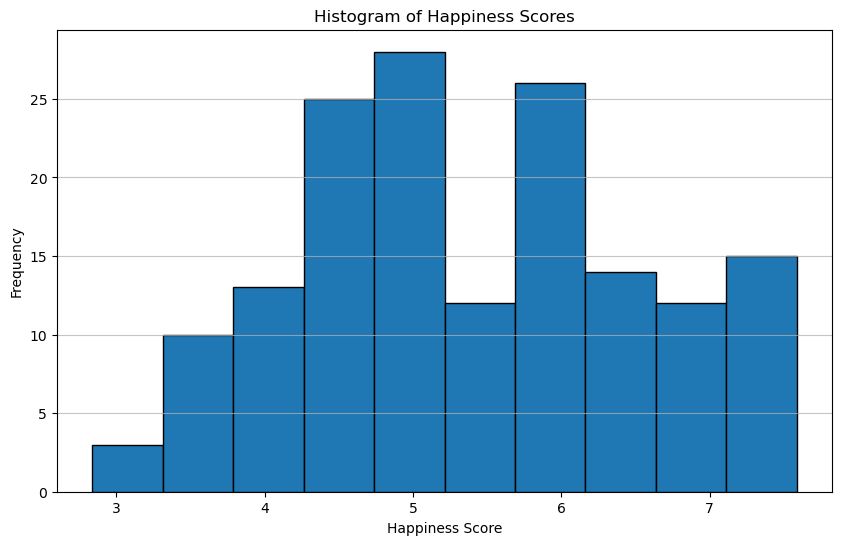

In [291]:
# Create a histogram
plt.figure(figsize=(10, 6))

plt.hist(Whappiness_2015['Happiness Score'], bins=10, edgecolor='black')

plt.title('Histogram of Happiness Scores')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Show the plot
plt.show()

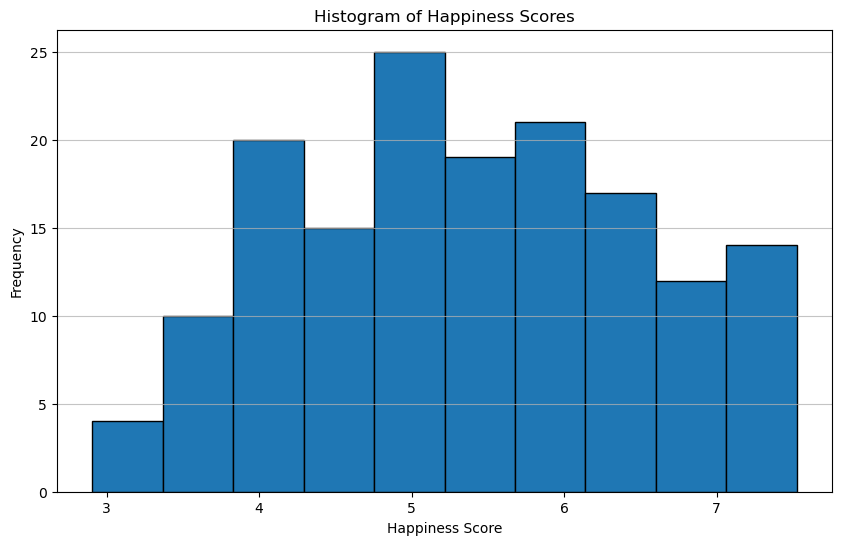

In [293]:
# Create a histogram
plt.figure(figsize=(10, 6))

plt.hist(Whappiness_2016['Happiness Score'], bins=10, edgecolor='black')

plt.title('Histogram of Happiness Scores')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Show the plot
plt.show()

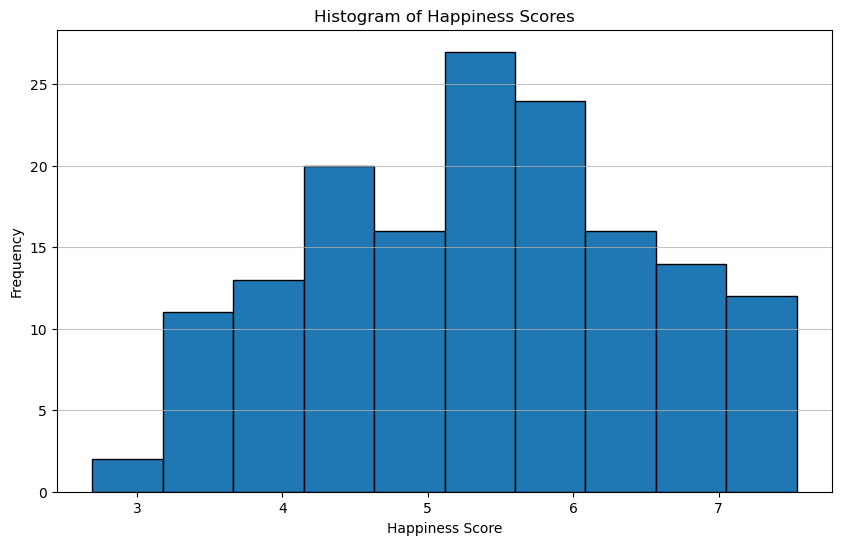

In [297]:
plt.figure(figsize=(10, 6))

plt.hist(Whappiness_2017['Happiness Score'], bins=10, edgecolor='black')

plt.title('Histogram of Happiness Scores')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Show the plot
plt.show()

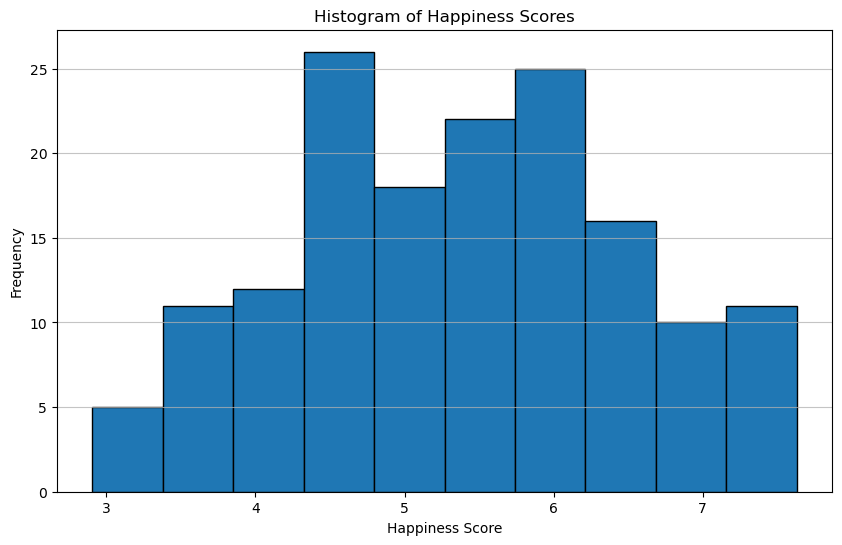

In [299]:
plt.figure(figsize=(10, 6))

plt.hist(Whappiness_2018['Happiness Score'], bins=10, edgecolor='black')

plt.title('Histogram of Happiness Scores')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Show the plot
plt.show()

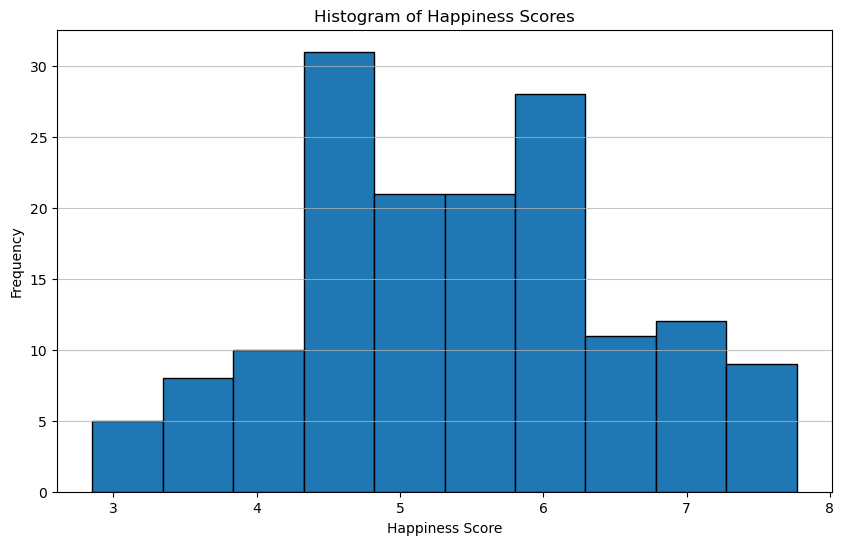

In [303]:
plt.figure(figsize=(10, 6))

plt.hist(Whappiness_2019['Happiness Score'], bins=10, edgecolor='black')

plt.title('Histogram of Happiness Scores')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Show the plot
plt.show()

## 3. Univariate Analysis: 

This involves examining single variables to understand their characteristics (distribution, central tendency, dispersion, and shape).

We calculate **numerical values** about the data that tells us about the distribution of the data. We also **draw graphs** showing visually how the data is distributed. **To answer the following questions about Features/characteristics of Data:**
- Where is the center of the data? (location)
- How much does the data vary? (scale)
- What is the shape of the data? (shape)

**The benefits of this analysis:**
Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

**In this step, we will explore variables one by one using following approaches:**

### 1. Univariate Graphical Analysis:
Method to perform uni-variate analysis will depend on whether the variable type is categorical or numerical.

#### I. Categorical Variables:

we’ll use frequency table to understand distribution of each category
- Bar Chart (Ordinal) - Orderd
- Pie Chart (Nominal) - non Orderd

#### II. Numerical Variables:

we need to understand the central tendency and spread of the variable (Descriptive Analysis) using:
   - Box plot
   - Histogram

### 2. Univariate Non-Graphical analysis: 

- Where is the center of the data? (location) --> **Measures of central tendency**
- How much does the data vary? (scale) --> **Measure of variability**
- What is the shape of the data? (shape) --> **Measures of variation combined with an average (measure of center) gives a good picture of the distribution of the data.**

### Communicating Results

In [178]:
Whappiness_2015.sort_values(by='Happiness Rank').head(10)

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


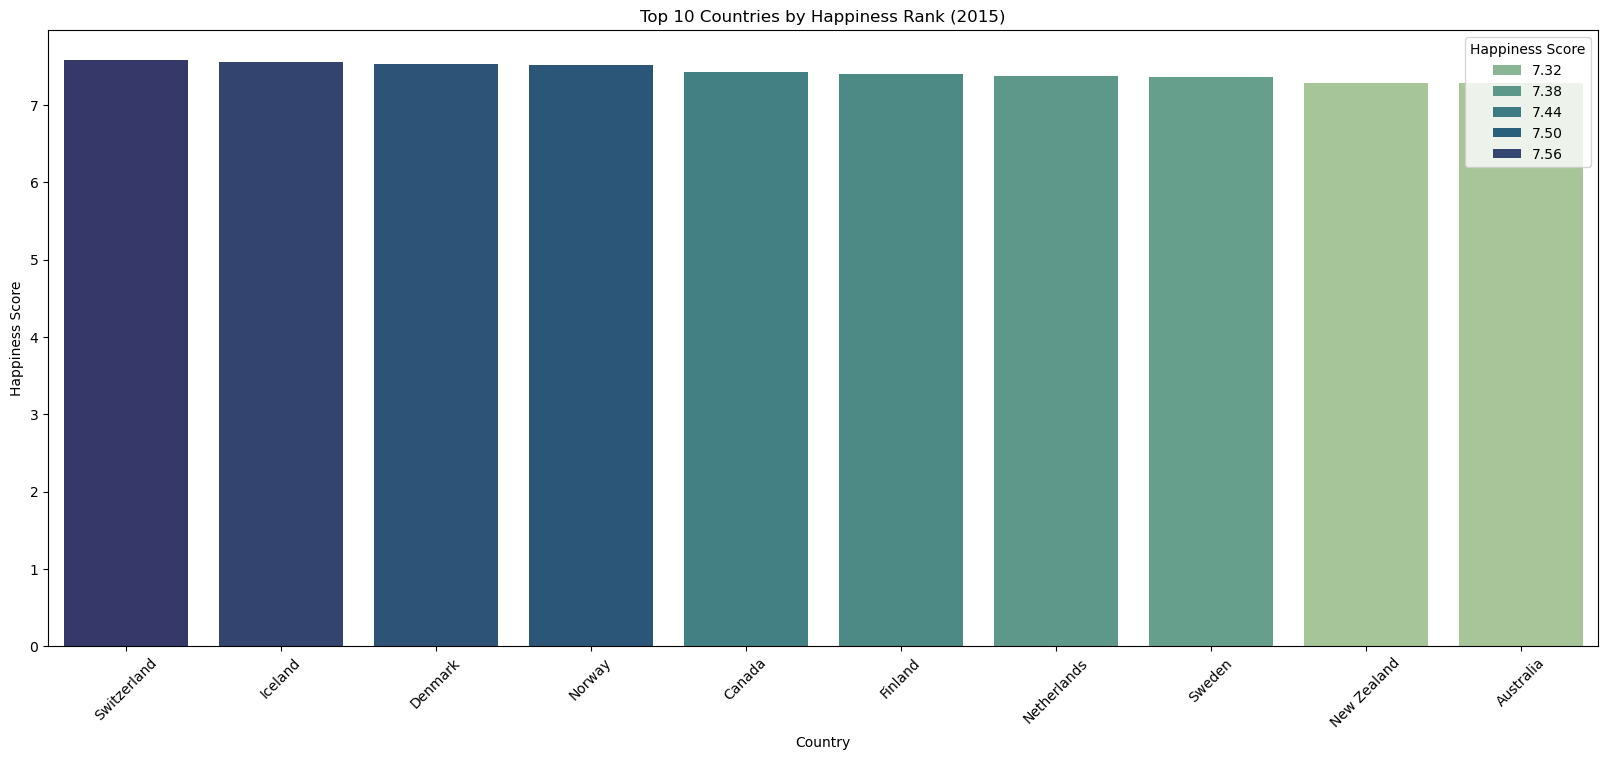

In [179]:
plt.figure(figsize=(20, 8))
ax = sns.barplot(x='Country', y='Happiness Score', 
                  data=Whappiness_2015.sort_values(by='Happiness Rank').head(10), 
                  hue='Happiness Score', 
                  palette='crest')

plt.title('Top 10 Countries by Happiness Rank (2015)')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.xticks(rotation=45)




plt.show()

In [287]:
Whappiness_2016.sort_values(by='Happiness Rank',ascending =False).head(10)

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
156,Burundi,Sub-Saharan Africa,157,2.905,0.06831,0.23442,0.15747,0.04320,0.09419,0.20290,2.10404
155,Syria,Middle East and Northern Africa,156,3.069,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789
154,Togo,Sub-Saharan Africa,155,3.303,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540
153,Afghanistan,Southern Asia,154,3.360,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558
152,Benin,Sub-Saharan Africa,153,3.484,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812
151,Rwanda,Sub-Saharan Africa,152,3.515,0.32846,0.61586,0.31865,0.54320,0.50521,0.23552,0.96819
150,Guinea,Sub-Saharan Africa,151,3.607,0.22415,0.31090,0.18829,0.30953,0.11920,0.29914,2.15604
149,Liberia,Sub-Saharan Africa,150,3.622,0.10706,0.50353,0.23165,0.25748,0.04852,0.24063,2.23284
148,Tanzania,Sub-Saharan Africa,149,3.666,0.47155,0.77623,0.35700,0.31760,0.05099,0.31472,1.37769
147,Madagascar,Sub-Saharan Africa,148,3.695,0.27954,0.46115,0.37109,0.13684,0.07506,0.22040,2.15075


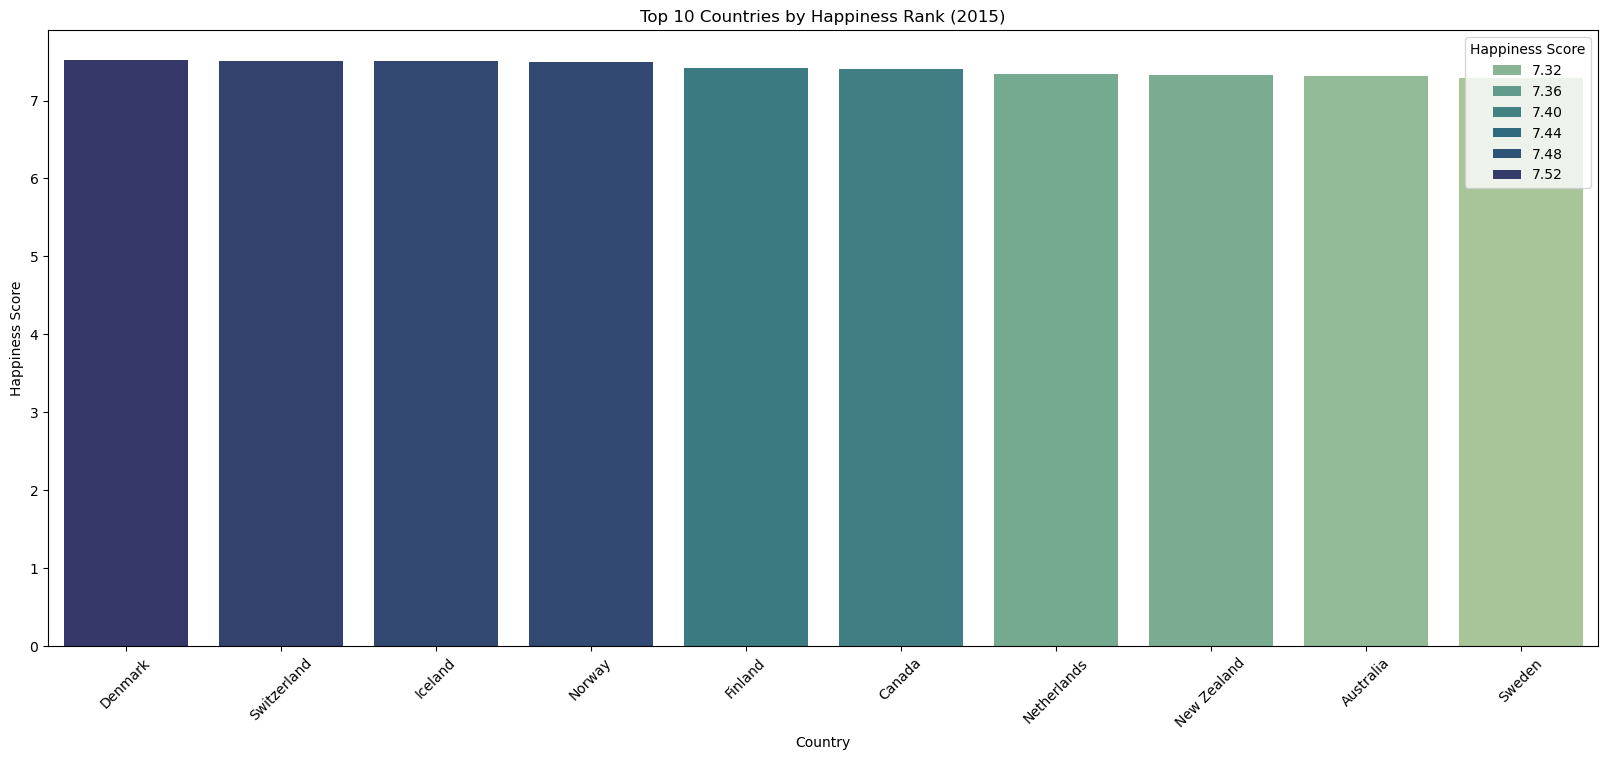

In [285]:
plt.figure(figsize=(20, 8))
ax = sns.barplot(x='Country', y='Happiness Score', 
                  data=Whappiness_2016.sort_values(by='Happiness Score', ascending =False).head(10), 
                  hue='Happiness Score', 
                  palette='crest')

plt.title('Top 10 Countries by Happiness Rank (2015)')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.xticks(rotation=45)




plt.show()

In [305]:
Whappiness_2017.sort_values(by='Happiness Rank',ascending =False).head(10)

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia.Residual
154,Central African Republic,155,2.693,0.000000,0.000000,0.018773,0.270842,0.280876,0.056565,2.066005
153,Burundi,154,2.905,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024
152,Tanzania,153,3.349,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130
151,Syria,152,3.462,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574
150,Rwanda,151,3.471,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061
149,Togo,150,3.495,0.305445,0.431883,0.247106,0.380426,0.196896,0.095665,1.837229
148,Guinea,149,3.507,0.244550,0.791245,0.194129,0.348588,0.264815,0.110938,1.552312
147,Liberia,148,3.533,0.119042,0.872118,0.229918,0.332881,0.266550,0.038948,1.673286
146,South Sudan,147,3.591,0.397249,0.601323,0.163486,0.147062,0.285671,0.116794,1.879567
145,Yemen,146,3.593,0.591683,0.935382,0.310081,0.249464,0.104125,0.056767,1.345601


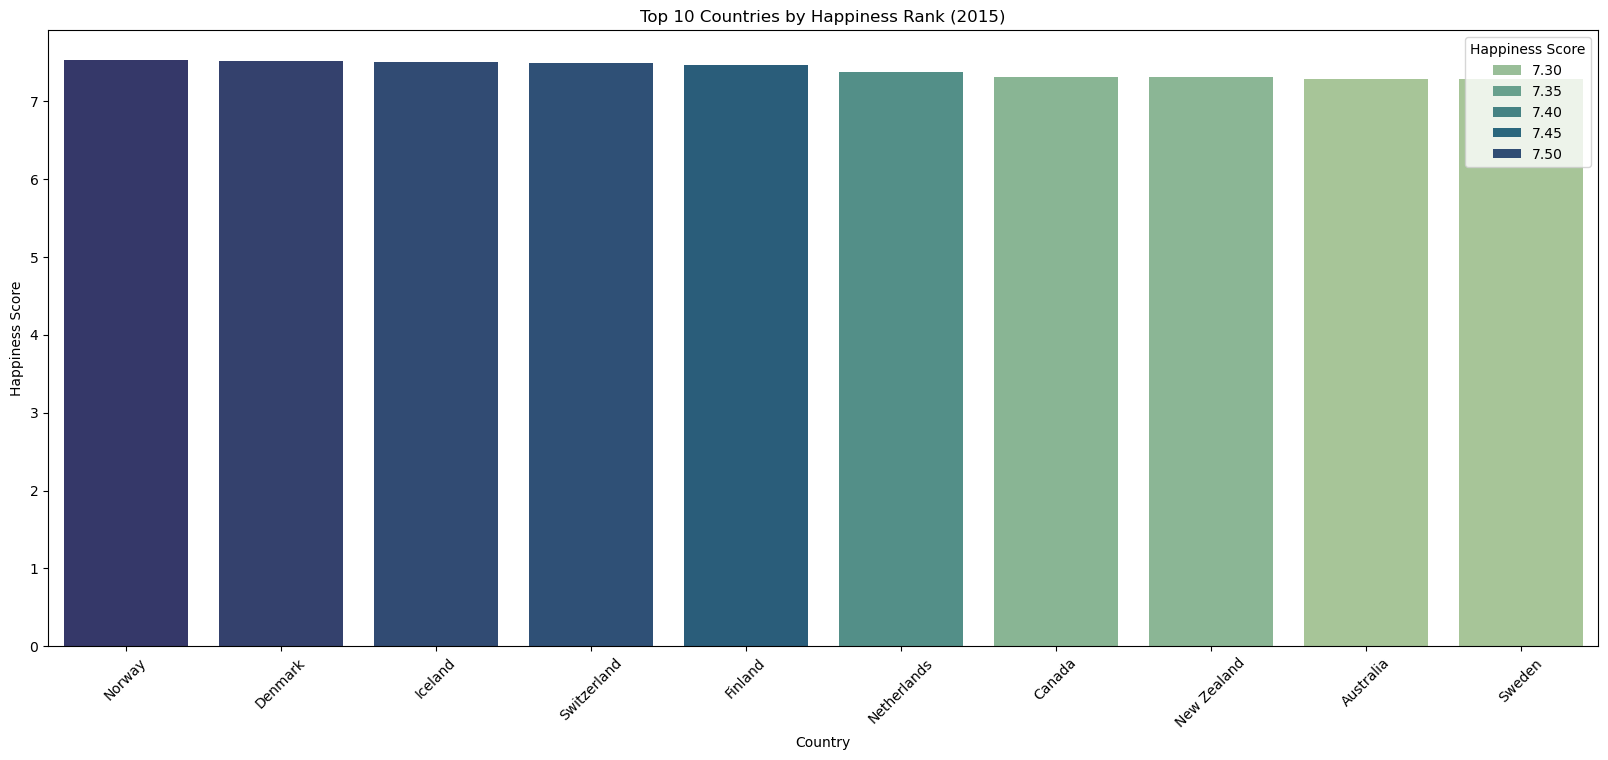

In [307]:
plt.figure(figsize=(20, 8))
ax = sns.barplot(x='Country', y='Happiness Score', 
                  data=Whappiness_2017.sort_values(by='Happiness Score', ascending =False).head(10), 
                  hue='Happiness Score', 
                  palette='crest')

plt.title('Top 10 Countries by Happiness Rank (2015)')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.xticks(rotation=45)




plt.show()

## 4. Bivariate/Multivariate Analysis:

Here, you look at the relationships between two or more variables. This can involve looking for correlations, patterns, and trends that suggest a relationship or an association.

We can perform bi-variate analysis for any combination of categorical and numerical variables. The combination can be:
| bi-variate variables   | Plot type |
| ------------- | ------------- |
| Categorical & Categorical| Stacked Bar Chart |
| Categorical & numerical  | scatter plot, histogram, box plot|
| numerical  & numerical  | Scatter plot, line chart| 


Multivariate Analysis:
- Heat map
- Bar Chart
- Scatter Chart
- Line Chart

In [305]:
Whappiness_2018.sort_values(by='Happiness Rank',ascending =False).head(10)

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia.Residual
154,Central African Republic,155,2.693,0.000000,0.000000,0.018773,0.270842,0.280876,0.056565,2.066005
153,Burundi,154,2.905,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024
152,Tanzania,153,3.349,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130
151,Syria,152,3.462,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574
150,Rwanda,151,3.471,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061
149,Togo,150,3.495,0.305445,0.431883,0.247106,0.380426,0.196896,0.095665,1.837229
148,Guinea,149,3.507,0.244550,0.791245,0.194129,0.348588,0.264815,0.110938,1.552312
147,Liberia,148,3.533,0.119042,0.872118,0.229918,0.332881,0.266550,0.038948,1.673286
146,South Sudan,147,3.591,0.397249,0.601323,0.163486,0.147062,0.285671,0.116794,1.879567
145,Yemen,146,3.593,0.591683,0.935382,0.310081,0.249464,0.104125,0.056767,1.345601


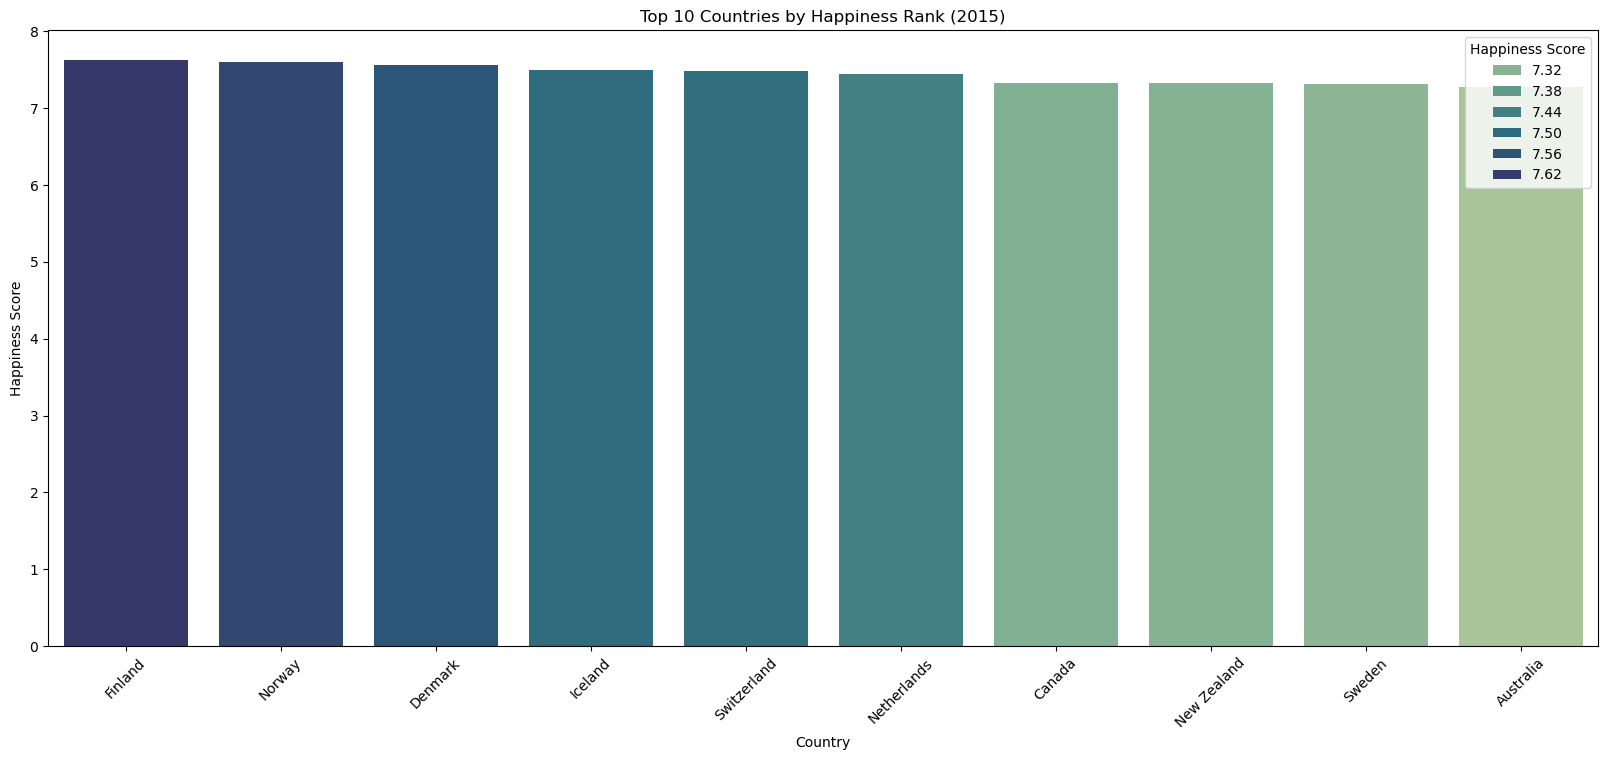

In [309]:
plt.figure(figsize=(20, 8))
ax = sns.barplot(x='Country', y='Happiness Score', 
                  data=Whappiness_2018.sort_values(by='Happiness Score', ascending =False).head(10), 
                  hue='Happiness Score', 
                  palette='crest')

plt.title('Top 10 Countries by Happiness Rank (2015)')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.xticks(rotation=45)




plt.show()

In [311]:
Whappiness_2019.sort_values(by='Happiness Rank',ascending =False).head(10)

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
155,South Sudan,Unknown,156.0,2.853,0.306,0.575,0.295,0.010,0.091,0.202
154,Central African Republic,Sub-Saharan Africa,155.0,3.083,0.026,0.000,0.105,0.225,0.035,0.235
153,Afghanistan,Southern Asia,154.0,3.203,0.350,0.517,0.361,0.000,0.025,0.158
152,Tanzania,Sub-Saharan Africa,153.0,3.231,0.476,0.885,0.499,0.417,0.147,0.276
151,Rwanda,Sub-Saharan Africa,152.0,3.334,0.359,0.711,0.614,0.555,0.411,0.217
150,Yemen,Middle East and Northern Africa,151.0,3.380,0.287,1.163,0.463,0.143,0.077,0.108
149,Malawi,Sub-Saharan Africa,150.0,3.410,0.191,0.560,0.495,0.443,0.089,0.218
148,Syria,Middle East and Northern Africa,149.0,3.462,0.619,0.378,0.440,0.013,0.141,0.331
147,Botswana,Sub-Saharan Africa,148.0,3.488,1.041,1.145,0.538,0.455,0.100,0.025
146,Haiti,Latin America and Caribbean,147.0,3.597,0.323,0.688,0.449,0.026,0.110,0.419


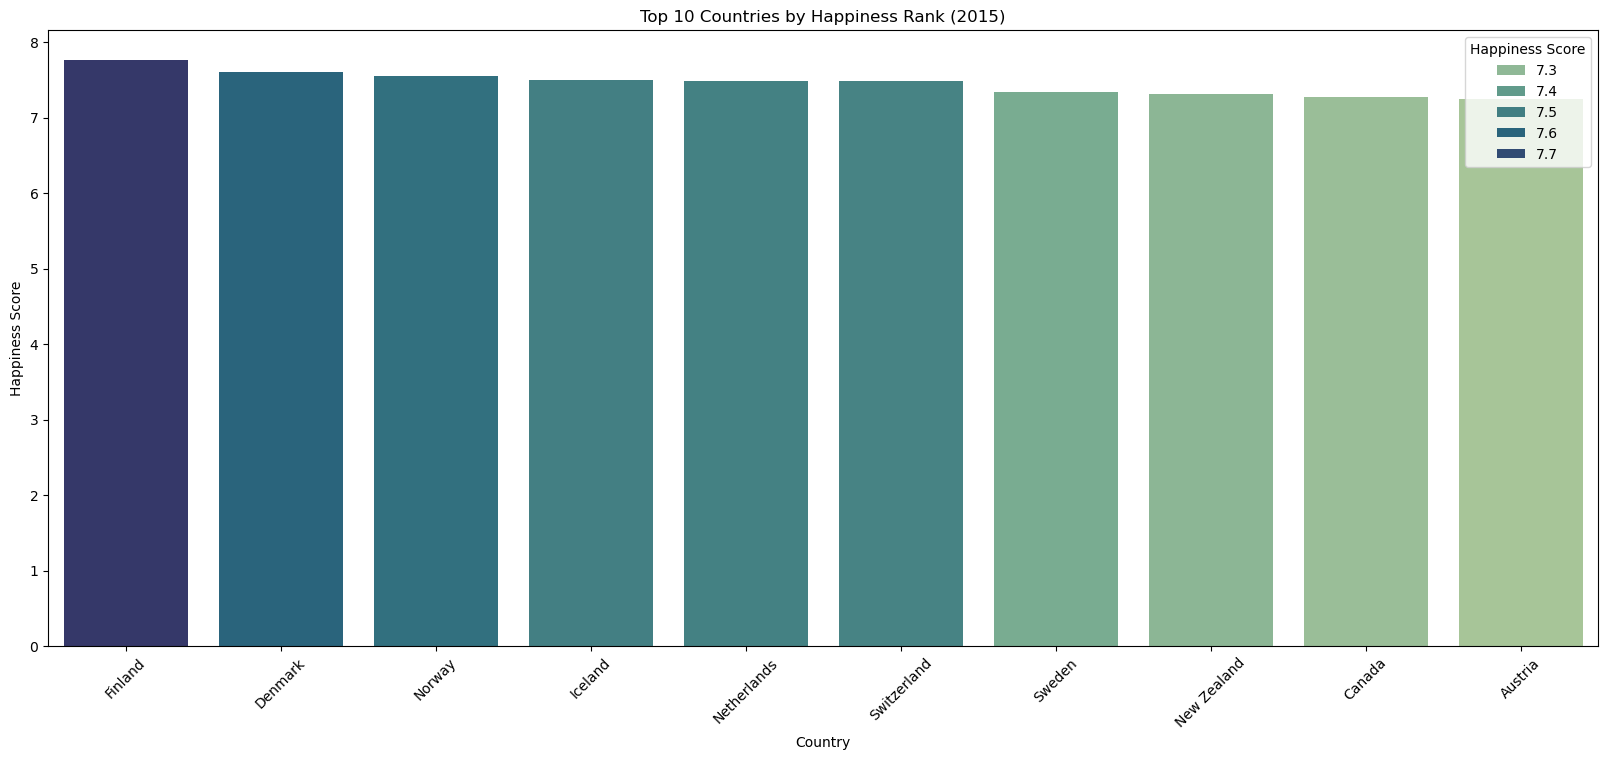

In [313]:
plt.figure(figsize=(20, 8))
ax = sns.barplot(x='Country', y='Happiness Score', 
                  data=Whappiness_2019.sort_values(by='Happiness Score', ascending =False).head(10), 
                  hue='Happiness Score', 
                  palette='crest')

plt.title('Top 10 Countries by Happiness Rank (2015)')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.xticks(rotation=45)




plt.show()

**Categorical & Categorical --> (Stacked Column Chart)**

**Categorical & numerical --> (scatter plot, histogram, box plot)**

**numerical & numerical --> (Scatter plot, line chart)**

We could also use a correlation matrix to get more specific information about the relationship between these two variables.